# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#3 Conclusions from Data Set
1. We can see as the latitude increases that the temperature decreases or gets cooler
2. As the distance from the equator increases the wind speed slowly increases
3. Humidity seems to be constant/equal across different latitudes 

In [239]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [240]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

579

In [241]:
url = "http://api.openweathermap.org/data/2.5/weather?"
response_json = []
units = "imperial"


# Build partial query URL

query_url = f"{url}appid={weather_api_key}&units={units}&q="
weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json,indent=4))

{
    "coord": {
        "lon": 50.2788,
        "lat": -14.9003
    },
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 74.21,
        "feels_like": 75.7,
        "temp_min": 74.21,
        "temp_max": 74.21,
        "pressure": 1016,
        "humidity": 93,
        "sea_level": 1016,
        "grnd_level": 1014
    },
    "visibility": 10000,
    "wind": {
        "speed": 2.51,
        "deg": 211,
        "gust": 2.77
    },
    "clouds": {
        "all": 79
    },
    "dt": 1635037127,
    "sys": {
        "country": "MG",
        "sunrise": 1635041203,
        "sunset": 1635086350
    },
    "timezone": 10800,
    "id": 1071296,
    "name": "Antalaha",
    "cod": 200
}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name). -->


In [242]:
latitude=[]
longitude=[]
temp_max=[]
humidity=[]
clouds=[]
wind_speeds=[]
countries=[]
date=[]
city_names=[]

for city in cities:
    response_json = requests.get(query_url + city).json()
#     print(json.dumps(response_json, indent = 4, sort_keys = True))
#     break
    
    try:
        city_name=response_json["name"]
        city_names.append(city)
        lati=response_json["coord"]["lat"]
        latitude.append(lati)
        long=response_json["coord"]["lon"]
        longitude.append(long)
        temperature=response_json["main"]["temp"]
        temp_max.append(temperature)
        hum=response_json["main"]["humidity"]
        humidity.append(hum)
        cld= response_json["clouds"]["all"]
        clouds.append(cld)
        wind=response_json["wind"]["speed"]
        wind_speeds.append(wind)
        cntr=response_json["sys"]["country"]
        countries.append(cntr)
        dt=response_json["dt"]
        date.append(dt)
        print(f"{city} is on the list.")
        
        
    except(KeyError,IndexError):
        print("The record does not exist")


butaritari is on the list.
bahia blanca is on the list.
luderitz is on the list.
The record does not exist
maturin is on the list.
wajid is on the list.
barrow is on the list.
port macquarie is on the list.
champerico is on the list.
dikson is on the list.
The record does not exist
pisco is on the list.
belaya gora is on the list.
cabo san lucas is on the list.
teguldet is on the list.
yagodnoye is on the list.
saint-philippe is on the list.
ribeira grande is on the list.
puerto ayora is on the list.
The record does not exist
lavrentiya is on the list.
bethel is on the list.
The record does not exist
port elizabeth is on the list.
ushuaia is on the list.
The record does not exist
mesen is on the list.
mataura is on the list.
torbay is on the list.
The record does not exist
carnarvon is on the list.
qaanaaq is on the list.
vaini is on the list.
khatanga is on the list.
norman wells is on the list.
tuktoyaktuk is on the list.
hobart is on the list.
ostrovnoy is on the list.
athens is on 

kutum is on the list.
west lafayette is on the list.
tyup is on the list.
igarka is on the list.
lebu is on the list.
owando is on the list.
bekovo is on the list.
karasjok is on the list.
vardo is on the list.
khandbari is on the list.
uttarkashi is on the list.
vila franca do campo is on the list.
bara is on the list.
kloulklubed is on the list.
iskateley is on the list.
The record does not exist
husavik is on the list.
tanete is on the list.
longhua is on the list.
huaibei is on the list.
byron bay is on the list.
The record does not exist
ulaangom is on the list.
saint george is on the list.
saint-pierre is on the list.
samana is on the list.
kupang is on the list.
todos santos is on the list.
passo de camaragibe is on the list.
santa fe is on the list.
aparecida do taboado is on the list.
deputatskiy is on the list.
lac du bonnet is on the list.
tommot is on the list.
ixtapa is on the list.
yumen is on the list.
The record does not exist
uravakonda is on the list.
ous is on the li

In [243]:
# print(len(lat),len(lon),len(temp_max),len(humidity),len(cloud),len(wind_speed),len(country),len(date),len(city_names))

<!--  Convert Raw Data to DataFrame -->
* Export the city data into a .csv.
* Display the DataFrame

In [244]:
city_df=pd.DataFrame({"City":city_names,"Lat":latitude,"Lng":longitude,"Max Temp":temp_max,"Humidity":humidity,"Cloudiness":clouds,
            "Wind Speed":wind_speeds,"Country":countries,"Date":date})

city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.0707,172.7902,81.16,73,56,8.10,KI,1635036696
1,bahia blanca,-38.7196,-62.2724,48.67,59,0,10.94,AR,1635037136
2,luderitz,-26.6481,15.1594,56.61,71,0,16.96,NA,1635036779
3,maturin,9.7500,-63.1767,72.81,97,79,4.92,VE,1635037137
4,wajid,3.8093,43.2471,73.51,88,16,9.86,SO,1635037137


In [245]:
city_df.to_csv("../output_data/cities.csv",index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

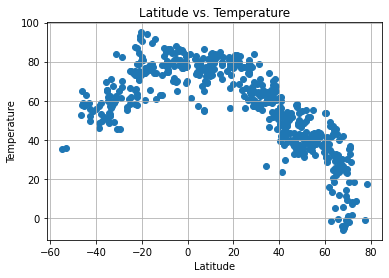

<Figure size 432x288 with 0 Axes>

In [273]:
x_values = city_df["Lat"]
y_values = city_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs. Temperature')
plt.grid(True)
plt.show()
plt.savefig("Latitude_vs_Temperature.png")

## Latitude vs. Humidity Plot

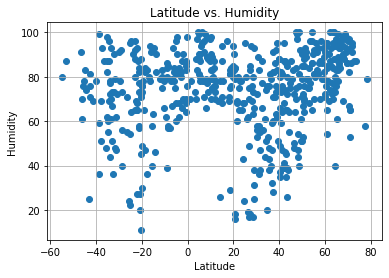

<Figure size 432x288 with 0 Axes>

In [260]:
x_values = city_df["Lat"]
y_values = city_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')
plt.grid(True)
plt.show()
plt.savefig("Images/Latitude_vs_Humidity.png")

## Latitude vs. Cloudiness Plot

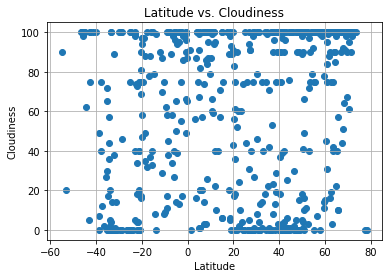

<Figure size 432x288 with 0 Axes>

In [261]:
x_values = city_df["Lat"]
y_values = city_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
plt.grid(True)
plt.show()
plt.savefig("Images/Latitude_vs_Cloudiness.png")

## Latitude vs. Wind Speed Plot

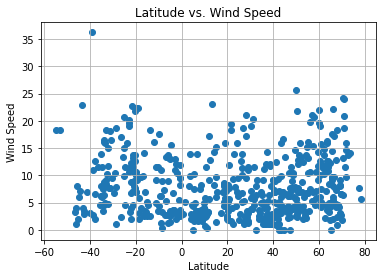

<Figure size 432x288 with 0 Axes>

In [262]:
x_values = city_df["Lat"]
y_values = city_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')
plt.grid(True)
plt.show()
plt.savefig("Images/Latitude_vs_Wind Speed.png")

## Linear Regression

In [250]:
north_hem= city_df.loc[city_df["Lat"]>=0]

south_hem= city_df.loc[city_df["Lat"]<0]

south_hem.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,bahia blanca,-38.7196,-62.2724,48.67,59,0,10.94,AR,1635037136
2,luderitz,-26.6481,15.1594,56.61,71,0,16.96,NA,1635036779
6,port macquarie,-31.4333,152.9167,83.89,62,14,18.16,AU,1635037138
9,pisco,-13.7000,-76.2167,60.85,82,0,18.41,PE,1635037139
14,saint-philippe,-21.3585,55.7679,71.26,84,40,13.22,RE,1635037142


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7835818864071603


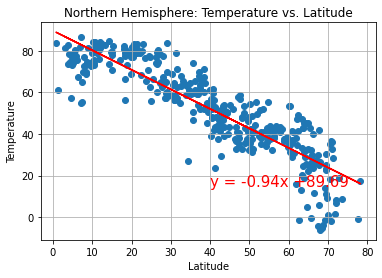

<Figure size 432x288 with 0 Axes>

In [265]:
#Set x and y intercept values
x_values = north_hem['Lat']
y_values = north_hem['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept


# Create line equation string to add this to our plot
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

#Create the plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
plt.grid(True)
plt.title('Northern Hemisphere: Temperature vs. Latitude')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()
plt.savefig("Images/Northern_Hemisphere_Temperature_vs_Latitude.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5212135194180395


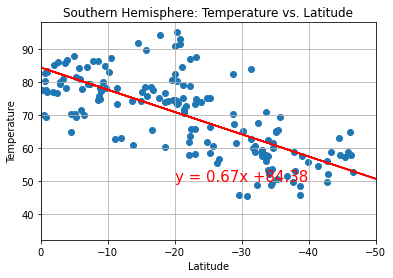

<Figure size 432x288 with 0 Axes>

In [266]:
#Set x and y intercept values
x_values = south_hem['Lat']
y_values = south_hem['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string to add this to our plot
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

#Create the plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-20,50),fontsize=15,color="red")
plt.grid(True)
plt.title('Southern Hemisphere: Temperature vs. Latitude')
plt.xlim(0,-50)
# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()
plt.savefig("Images/Southern_Hemisphere_Temperature_s_Latitude.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.02270187544859955


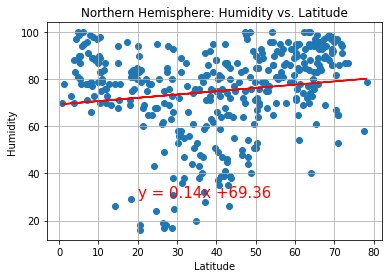

<Figure size 432x288 with 0 Axes>

In [267]:
#Set x and y intercept values
x_values = north_hem['Lat']
y_values = north_hem['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string to add this to our plot
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

#Create the plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.grid(True)
plt.title('Northern Hemisphere: Humidity vs. Latitude')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()
plt.savefig("Images/Northern_Hemisphere_Humidity_vs_Latitude.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.013357777539318449


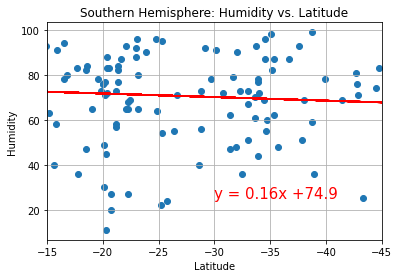

<Figure size 432x288 with 0 Axes>

In [268]:
#Set x and y intercept values
x_values = south_hem['Lat']
y_values = south_hem['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string to add this to our plot
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

#Create the plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.grid(True)
plt.title('Southern Hemisphere: Humidity vs. Latitude')
plt.xlim(-15,-45)
# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()
plt.savefig("Images/Southern_Hemisphere_Humidity_vs_Latitude.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03390910115082352


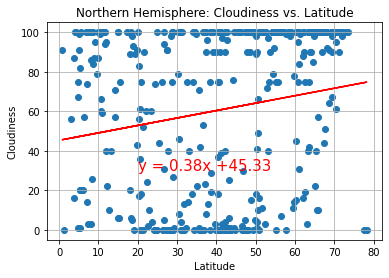

<Figure size 432x288 with 0 Axes>

In [269]:
#Set x and y intercept values
x_values = north_hem['Lat']
y_values = north_hem['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string to add this to our plot
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

#Create the plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.grid(True)
plt.title('Northern Hemisphere: Cloudiness vs. Latitude')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()
plt.savefig("Images/Northern_Hemisphere_Cloudiness_vs_Latitude.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03470514471800474


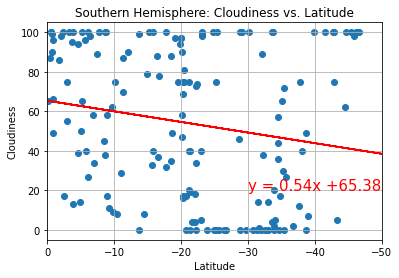

<Figure size 432x288 with 0 Axes>

In [270]:
#Set x and y intercept values
x_values = south_hem['Lat']
y_values = south_hem['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string to add this to our plot
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

#Create the plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.grid(True)
plt.title('Southern Hemisphere: Cloudiness vs. Latitude')
plt.xlim(0,-50)
# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()
plt.savefig("Images/Southern_Hemisphere_Cloudiness_vs_Latitude.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.07419493240061882


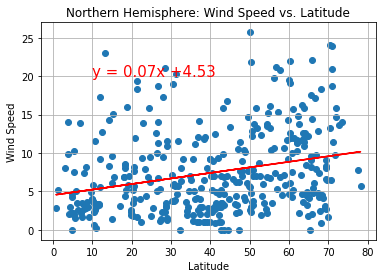

<Figure size 432x288 with 0 Axes>

In [271]:
#Set x and y intercept values
x_values = north_hem['Lat']
y_values = north_hem['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string to add this to our plot
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

#Create the plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.grid(True)
plt.title('Northern Hemisphere: Wind Speed vs. Latitude')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()
plt.savefig("Images/Northern_Hemisphere_Wind_Speed_vs_Latitude.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.02509215218189259


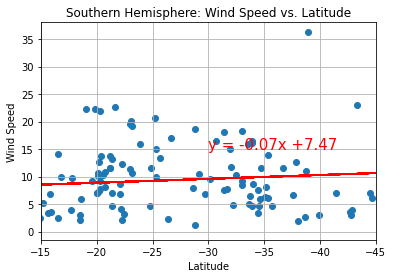

<Figure size 432x288 with 0 Axes>

In [272]:
#Set x and y intercept values
x_values = south_hem['Lat']
y_values = south_hem['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string to add this to our plot
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

#Create the plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-30,15),fontsize=15,color="red")
plt.grid(True)
plt.title('Southern Hemisphere: Wind Speed vs. Latitude')
plt.xlim(-15,-45)
# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()
plt.savefig("Images/Southern_Hemisphere_Wind_Speed_vs_Latitude.png")